In [1]:
import time
import math
import numpy as np
import tensorly as tl
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from brokenaxes import brokenaxes
from online_tensor_decomposition import *

In [2]:
# for sample video
from cv2 import VideoWriter, VideoWriter_fourcc, imshow, imwrite

def make_video(tensor, filename, isColor=True):
    start = time.time()
    height = tensor.shape[1]
    width = tensor.shape[2]
    FPS = 24

    fourcc = VideoWriter_fourcc(*'MP42')
    video = VideoWriter(filename, fourcc, float(FPS), (width, height), isColor)

    for frame in tensor:
        video.write(np.uint8(frame))
    video.release()
    print('created', filename, time.time()-start)

In [3]:
try:
    import cPickle as pickle
except ImportError:  # Python 3.x
    import pickle

In [4]:
results = {}
with open('results_0117.p', 'rb') as fp:
    results = pickle.load(fp)

In [49]:
results = {}
with open('results_0127.p', 'rb') as fp:
    results = pickle.load(fp)

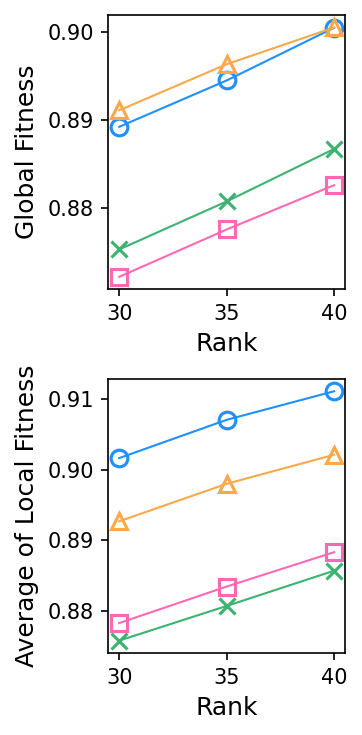

In [47]:
def plot_acc(datasets, name):
    colors = ('dodgerblue','mediumseagreen', 'hotpink', '#fba84a')
    libs = ("dao", "dtd", "ocp", 'fcp')
    patterns = ( "" , "\\\\\\\\\\" , "////" , "xxxx")
    markers = ("o", "x", "s", "^", "4")
    ticks = [e.split('-')[-1] for e in datasets]
    index = np.arange(3)
    
    # create plot
    fig, axes = plt.subplots(2, 1, figsize = (2.5, 5), dpi = 150)
    ax1, ax2 = axes

    ax1.tick_params(axis='y')
    ax1.set_xlabel('Rank', size=12)
    ax1.set_xticks(index) 
    ax1.set_xticklabels(ticks)
    ax1.set_ylabel('Global Fitness', size=12)
    for i, (color, lib) in enumerate(zip(colors, libs)):
        acc_list = [results[dataset][lib][0] for dataset in datasets]
        ax1.plot(index, acc_list, color=colors[i], marker=markers[i], linewidth=1, markersize=8, markerfacecolor="None", markeredgewidth=1.5)
    
    ax2.tick_params(axis='y')
    ax2.set_xlabel('Rank', size=12)
    ax2.set_xticks(index) 
    ax2.set_xticklabels(ticks)
    ax2.set_ylabel('Average of Local Fitness', size=12)
    for i, (color, lib) in enumerate(zip(colors, libs)):
        acc_list = [results[dataset][lib][1] for dataset in datasets]
        ax2.plot(index, acc_list, color=colors[i], marker=markers[i], linewidth=1, markersize=8, markerfacecolor="None", markeredgewidth=1.5)
    
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.savefig(f'./plots/{name}.svg', bbox_inches = 'tight', pad_inches = 0)
#     plt.show()
    
# plot_acc(('synthetic-20', 'synthetic-30', 'synthetic-40'), 'acc_synthetic')
# plot_acc(('video-20', 'video-30', 'video-40'), 'acc_video')
# plot_acc(('stock-20', 'stock-22', 'stock-24'), 'acc_stock')
plot_acc(('hall-30', 'hall-35', 'hall-40'), 'acc_hall')
# plot_acc(('korea-30', 'korea-40', 'korea-50'), 'acc_korea')

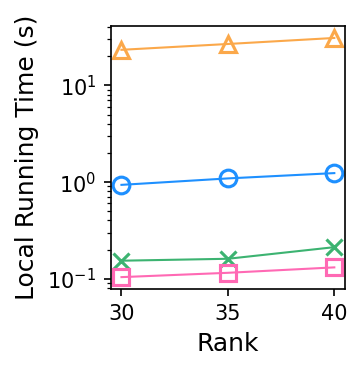

In [48]:
def plot_rt(datasets, name):
    colors = ('dodgerblue','mediumseagreen', 'hotpink', '#fba84a')
    libs = ("dao", "dtd", "ocp", 'fcp')
    patterns = ( "" , "\\\\\\\\\\" , "////" , "xxxx")
    markers = ("o", "x", "s", "^", "4")
    ticks = [e.split('-')[-1] for e in datasets]
    index = np.arange(3)
    
    # create plot
    fig, ax = plt.subplots(1, 1, figsize = (2.5, 2.5), dpi = 150)
    
    plt.yscale('log')
    ax.tick_params(axis='y')
    ax.set_xlabel('Rank', size=12)
    ax.set_xticks(index) 
    ax.set_xticklabels(ticks)
    ax.set_ylabel('Local Running Time (s)', size=12)
    for i, (color, lib) in enumerate(zip(colors, libs)):
        acc_list = [results[dataset][lib][3] for dataset in datasets]
        ax.plot(index, acc_list, color=colors[i], marker=markers[i], linewidth=1, markersize=8, markerfacecolor="None", markeredgewidth=1.5)
    
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.savefig(f'./plots/{name}.svg', bbox_inches = 'tight', pad_inches = 0)
#     plt.show()
    
# plot_rt(('synthetic-20', 'synthetic-30', 'synthetic-40'), 'rt_synthetic')
# plot_rt(('video-20', 'video-30', 'video-40'), 'rt_video')
# plot_rt(('stock-20', 'stock-22', 'stock-24'), 'rt_stock')
plot_rt(('hall-30', 'hall-35', 'hall-40'), 'rt_hall')
# plot_rt(('korea-30', 'korea-40', 'korea-50'), 'rt_korea')

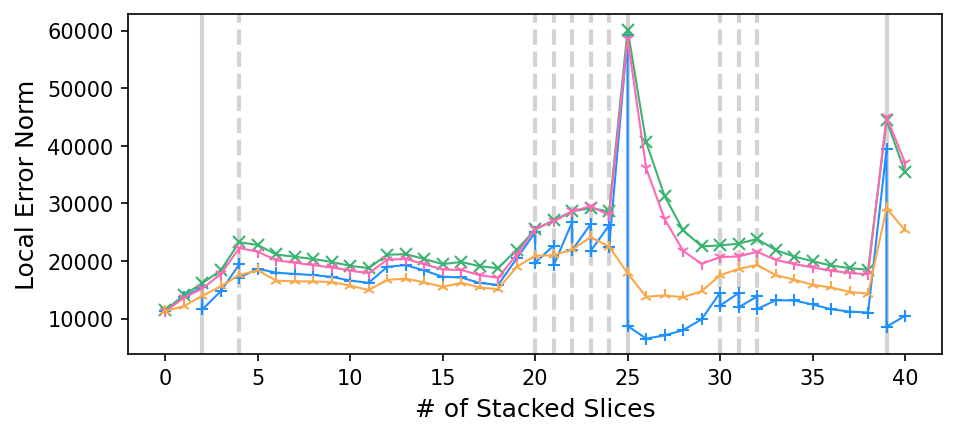

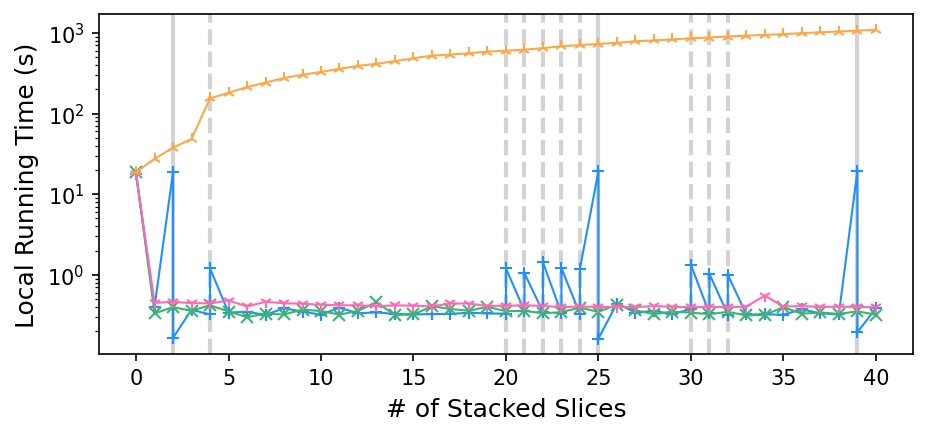

In [50]:
def plot_E5_error(dataset):
    
    markers = ("+", "x", "1", "2")
    colors = ('dodgerblue','mediumseagreen', 'hotpink', '#fba84a')
    libs = ("dao", "dtd", "ocp", "fcp")
    fig = plt.figure(figsize = (7, 3), dpi = 150,) 
    plt.ylabel('Local Error Norm', fontsize=12)
    plt.xlabel('# of Stacked Slices', fontsize=12)
    #         ax1.xaxis.set_label_position('top')
    
    
    split_points, refine_points = results[dataset]['dao'][6]
    for p in refine_points:
        plt.axvline(p,  label='line: {}'.format(p), c='lightgray', linewidth=2, linestyle='--')
    for p in split_points:
        plt.axvline(p,  label='line: {}'.format(p), c='lightgray', linewidth=2, linestyle='-')
    
    for color, marker, lib in zip(colors, markers, libs):
        verbose_list = results[dataset][lib][5]
        plt.plot(verbose_list[:,0], verbose_list[:,2], linewidth=1, marker=marker, color=color)
    plt.savefig('plots/E5_{}_error.pdf'.format(dataset), bbox_inches='tight', pad_inches=0)
    
plot_E5_error('video')
    
def plot_E5_rt(dataset):
    markers = ("+", "x", "1", "2")
    colors = ('dodgerblue','mediumseagreen', 'hotpink', '#fba84a')
    libs = ("dao", "dtd", "ocp", "fcp")
    plt.figure(figsize = (7, 3), dpi = 150,) 
    
    plt.yscale('log')
    plt.ylabel('Local Running Time (s)', fontsize=12)
    plt.xlabel('# of Stacked Slices', fontsize=12)
    #         ax1.xaxis.set_label_position('top')
    
    
    split_points, refine_points = results[dataset]['dao'][6]
    for p in refine_points:
        plt.axvline(p,  label='line: {}'.format(p), c='lightgray', linewidth=2, linestyle='--')
    for p in split_points:
        plt.axvline(p,  label='line: {}'.format(p), c='lightgray', linewidth=2, linestyle='-')
    
    for color, marker, lib in zip(colors, markers, libs):
        verbose_list = results[dataset][lib][5]
        plt.plot(verbose_list[:,0], verbose_list[:,1], linewidth=1, marker=marker, color=color)
        plt.savefig('plots/E5_{}_rt.pdf'.format(dataset), bbox_inches='tight', pad_inches=0)
        
plot_E5_rt('video')

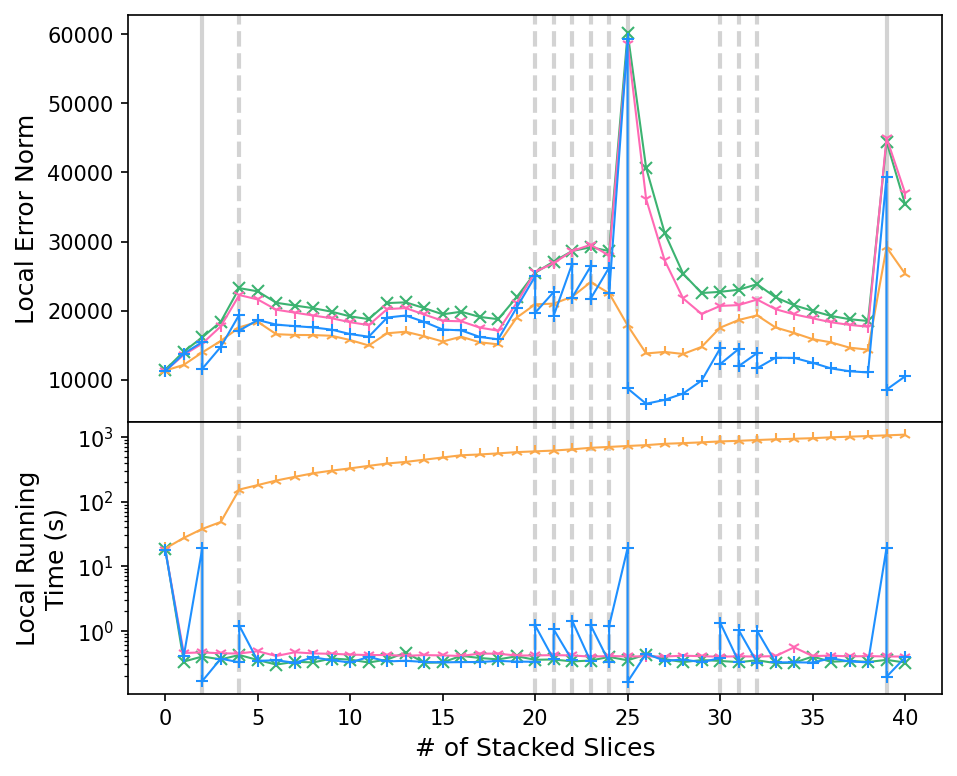

In [78]:
from matplotlib import gridspec

def plot_E5(dataset):
    
    markers = ("x", "1", "2", "+")
    colors = ('mediumseagreen', 'hotpink', '#fba84a', 'dodgerblue')
    libs = ("dtd", "ocp", "fcp", "dao")
    
    fig = plt.figure(figsize = (7, 6), dpi = 150)
    
    gs = gridspec.GridSpec(2, 1, height_ratios=[1.5, 1]) 
    ax1 = plt.subplot(gs[0])
    
    ax1.set_ylabel('Local Error Norm', fontsize=12)
#     ax1.set_xlabel('# of Stacked Slices', fontsize=12)
    #         ax1.xaxis.set_label_position('top')
    
    
    split_points, refine_points = results[dataset]['dao'][6]
    for p in refine_points:
        ax1.axvline(p,  label='line: {}'.format(p), c='lightgray', linewidth=2, linestyle='--')
    for p in split_points:
        ax1.axvline(p,  label='line: {}'.format(p), c='lightgray', linewidth=2, linestyle='-')
    
    for color, marker, lib in zip(colors, markers, libs):
        verbose_list = results[dataset][lib][5]
        ax1.plot(verbose_list[:,0], verbose_list[:,2], linewidth=1, marker=marker, color=color)
        
    ax2 = plt.subplot(gs[1], sharex = ax1)
    ax2.set_yscale('log')
    ax2.set_ylabel('Local Running\nTime (s)', fontsize=12)
    ax2.set_xlabel('# of Stacked Slices', fontsize=12)
    #         ax1.xaxis.set_label_position('top')
    
    split_points, refine_points = results[dataset]['dao'][6]
    for p in refine_points:
        ax2.axvline(p,  label='line: {}'.format(p), c='lightgray', linewidth=2, linestyle='--')
    for p in split_points:
        ax2.axvline(p,  label='line: {}'.format(p), c='lightgray', linewidth=2, linestyle='-')
    
    for color, marker, lib in zip(colors, markers, libs):
        verbose_list = results[dataset][lib][5]
        ax2.plot(verbose_list[:,0], verbose_list[:,1], linewidth=1, marker=marker, color=color)
#     plt.savefig('plots/E5_{}_rt.pdf'.format(dataset), bbox_inches='tight', pad_inches=0)
        
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.subplots_adjust(hspace=.0)
#     fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    
plot_E5('video')

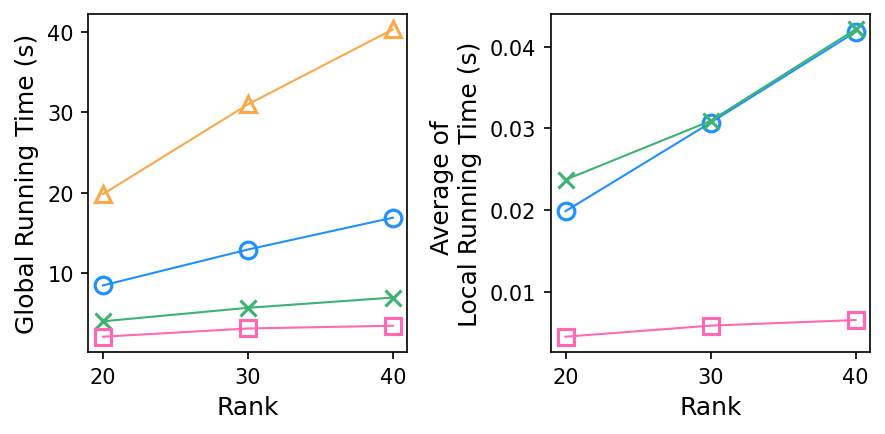

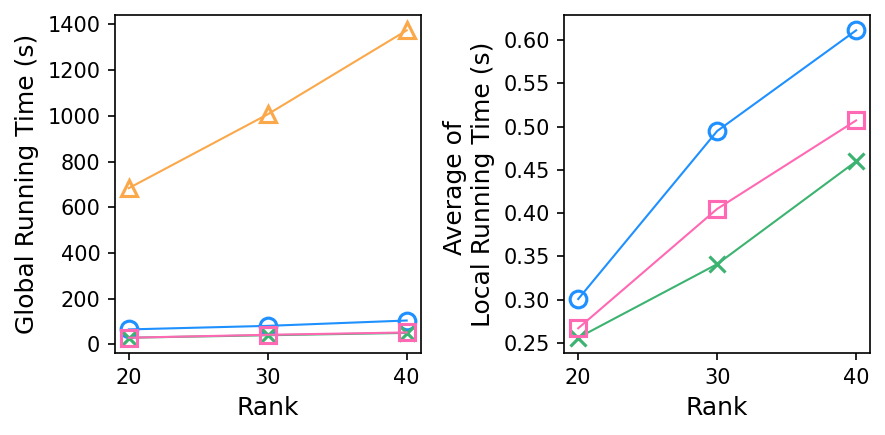

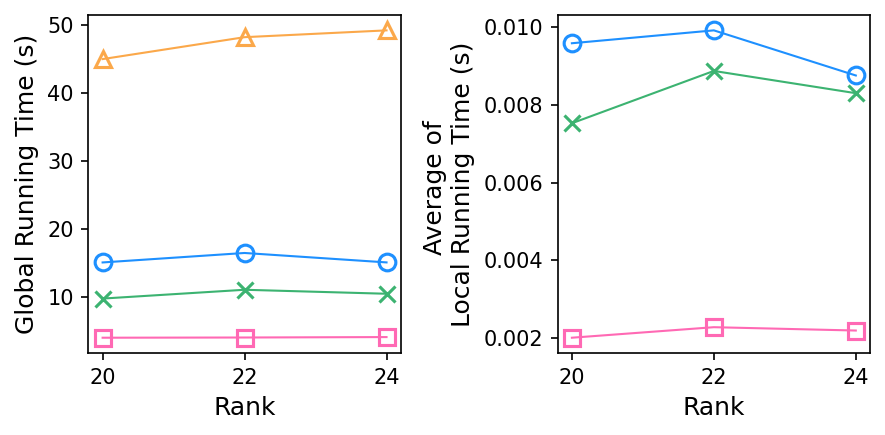

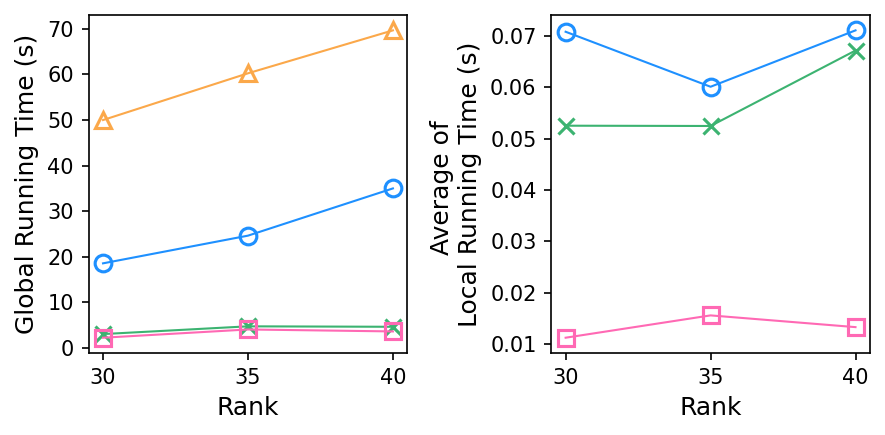

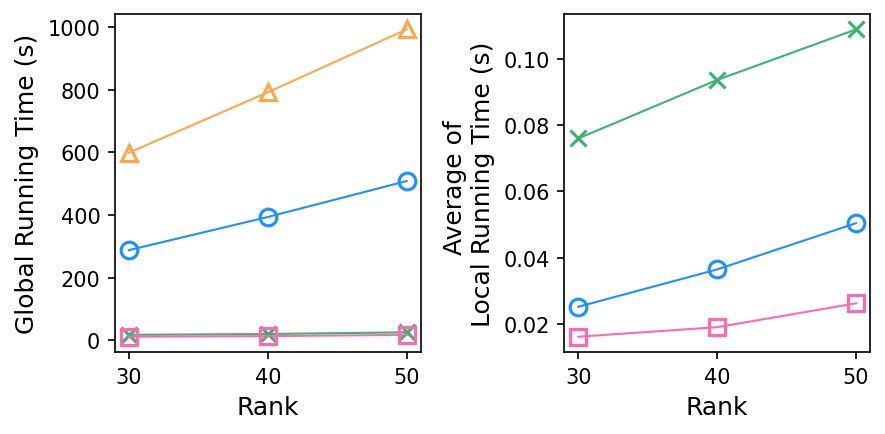

In [25]:
def plot_rt(datasets, name):
    colors = ('dodgerblue','mediumseagreen', 'hotpink', '#fba84a')
    libs = ("dao", "dtd", "ocp", 'fcp')
    patterns = ( "" , "\\\\\\\\\\" , "////" , "xxxx")
    markers = ("o", "x", "s", "^", "4")
    ticks = [e.split('-')[-1] for e in datasets]
    index = np.arange(3)
    
    # create plot
    fig, axes = plt.subplots(1, 2, figsize = (6, 3), dpi = 150)
    ax1, ax2 = axes

    ax1.tick_params(axis='y')
    ax1.set_xlabel('Rank', size=12)
    ax1.set_xticks(index) 
    ax1.set_xticklabels(ticks)
    ax1.set_ylabel('Global Running Time (s)', size=12)
    for i, (color, lib) in enumerate(zip(colors, libs)):
        acc_list = [results[dataset][lib][2] for dataset in datasets]
        ax1.plot(index, acc_list, color=colors[i], marker=markers[i], linewidth=1, markersize=8, markerfacecolor="None", markeredgewidth=1.5)
    
    ax2.tick_params(axis='y')
    ax2.set_xlabel('Rank', size=12)
    ax2.set_xticks(index) 
    ax2.set_xticklabels(ticks)
    ax2.set_ylabel('Average of \nLocal Running Time (s)', size=12)
    for i, (color, lib) in enumerate(zip(colors, libs[:-1])):
        acc_list = [results[dataset][lib][3] for dataset in datasets]
        ax2.plot(index, acc_list, color=colors[i], marker=markers[i], linewidth=1, markersize=8, markerfacecolor="None", markeredgewidth=1.5)
    
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.savefig(f'./plots/{name}.svg', bbox_inches = 'tight', pad_inches = 0)
#     plt.show()
    
plot_rt(('synthetic-20', 'synthetic-30', 'synthetic-40'), 'rt_synthetic')
plot_rt(('video-20', 'video-30', 'video-40'), 'rt_video')
plot_rt(('stock-20', 'stock-22', 'stock-24'), 'rt_stock')
plot_rt(('hall-30', 'hall-35', 'hall-40'), 'rt_hall')
plot_rt(('korea-30', 'korea-40', 'korea-50'), 'rt_korea')

---
# Experiment #2

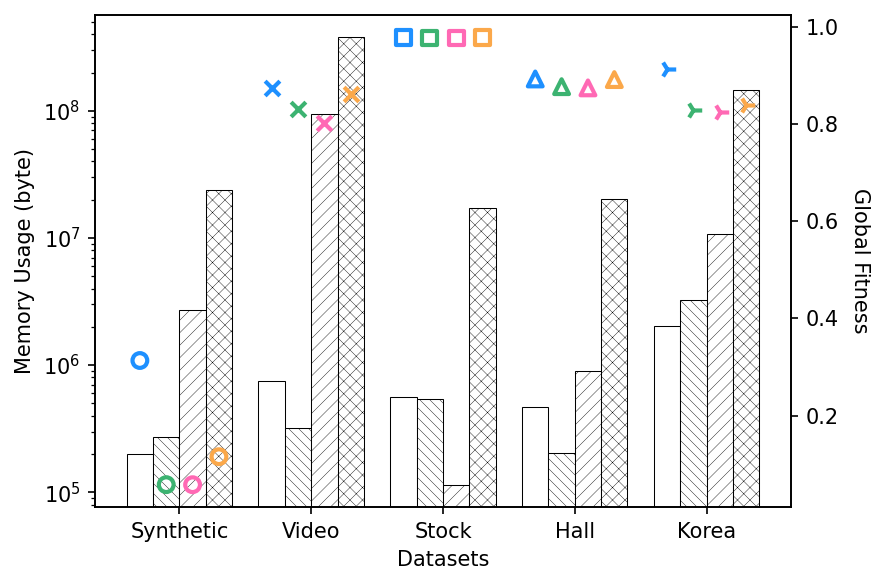

In [30]:
from matplotlib import colors
def make_rgb_transparent(color, alpha=0.6, bg_rgb=(1,1,1)):
    rgb = colors.colorConverter.to_rgb(color)
    return [alpha * c1 + (1 - alpha) * c2
            for (c1, c2) in zip(rgb, bg_rgb)]

def plot_mem(datasets, name):
    colors = ('dodgerblue','mediumseagreen', 'hotpink', '#fba84a')
    libs = ("dao", "dtd", "ocp", 'fcp')
    patterns = ( "" , "\\\\\\\\\\" , "////" , "xxxx")
    markers = ("o", "x", "s", "^", "4")
    
    index = np.arange(5)
    bar_width = 0.2

    
    # create plot
    fig, ax1 = plt.subplots(figsize = (6, 4), dpi = 150)
    plt.xticks(index + bar_width*1.5, ('Synthetic', 'Video', 'Stock', 'Hall', 'Korea'))
    plt.rcParams['hatch.linewidth'] = 0.2

    for i, (color, lib) in enumerate(zip(colors, libs)):
        mem_list = [results[dataset][lib][4] for dataset in datasets]
        
        rects1 = ax1.bar(index + bar_width*i, mem_list, bar_width, color=make_rgb_transparent(color, alpha=0.0), label=lib, edgecolor='black', hatch=patterns[i], linewidth=0.5)

    ax1.set_xlabel('Datasets')
    ax1.set_ylabel('Memory Usage (byte)')
    ax1.set_yscale('log')

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    for i, (color, lib) in enumerate(zip(colors, libs)):
        acc_list = [results[dataset][lib][0] for dataset in datasets]
        for j, acc in enumerate(acc_list):
            if j == 4:
                ax2.scatter(index[j] + bar_width*i, acc, 70, color=colors[i], marker=markers[j], linewidth=2)
            elif j == 1: 
                ax2.scatter(index[j] + bar_width*i, acc, 50, color=colors[i], marker=markers[j], linewidth=2)
            else:
                ax2.scatter(index[j] + bar_width*i, acc, 50, color=colors[i], marker=markers[j], facecolors='none', linewidth=2)
    ax2.tick_params(axis='y')

    ax2.set_ylabel('Global Fitness', rotation=270, labelpad=15)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
#     plt.savefig(f'./plots/{name}_mem.pdf', bbox_inches = 'tight', pad_inches = 0)
plot_mem(('synthetic-30', 'video-30', 'stock-20', 'hall-30', 'korea-40'), 'E2')

[199424, 744488, 557472, 469496, 2024776]
[270160, 320800, 541736, 202696, 3244936]
[2717056, 94372576, 114616, 892536, 10744216]
[24000232, 377856232, 17298616, 20275416, 146962632]
[120.34776155327343, 507.53837805310496, 31.030466104127203, 43.18549252815785, 72.5821681015579]


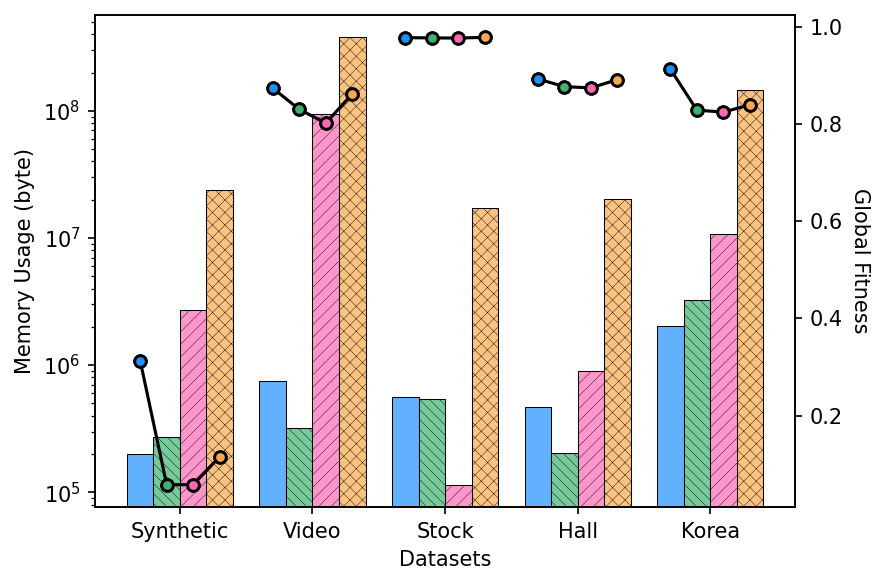

In [34]:
from matplotlib import colors
def make_rgb_transparent(color, alpha=0.6, bg_rgb=(1,1,1)):
    rgb = colors.colorConverter.to_rgb(color)
    return [alpha * c1 + (1 - alpha) * c2
            for (c1, c2) in zip(rgb, bg_rgb)]

def plot_mem(datasets, name):
    colors = ('dodgerblue','mediumseagreen', 'hotpink', '#fba84a')
    libs = ("dao", "dtd", "ocp", 'fcp')
    patterns = ( "" , "\\\\\\\\\\" , "////" , "xxxx")
    markers = ("o", "x", "s", "^", "4")
    
    index = np.arange(5)
    bar_width = 0.2

    
    # create plot
    fig, ax1 = plt.subplots(figsize = (6, 4), dpi = 150)
    plt.xticks(index + bar_width*1.5, ('Synthetic', 'Video', 'Stock', 'Hall', 'Korea'))
    plt.rcParams['hatch.linewidth'] = 0.2

    for i, (color, lib) in enumerate(zip(colors, libs)):
        mem_list = [results[dataset][lib][4] for dataset in datasets]
        print(mem_list)
        
        rects1 = ax1.bar(index + bar_width*i, mem_list, bar_width, color=make_rgb_transparent(color, alpha=0.7), label=lib, edgecolor='black', hatch=patterns[i], linewidth=0.5)

    ax1.set_xlabel('Datasets')
    ax1.set_ylabel('Memory Usage (byte)')
    ax1.set_yscale('log')

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    for i, dataset in enumerate(datasets):
        acc_list = [results[dataset][lib][0] for lib in libs]   
        ax2.plot(i + bar_width*index[:4], acc_list, marker="o", color='black', zorder=1)
    for i, (color, lib) in enumerate(zip(colors, libs)):
        acc_list = [results[dataset][lib][0] for dataset in datasets]        
        ax2.scatter(index + bar_width*i, acc_list, 30, color='black', marker="o", facecolor=colors[i], linewidth=1.3, zorder=2)
    ax2.tick_params(axis='y')

    ax2.set_ylabel('Global Fitness', rotation=270, labelpad=13)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
#     plt.show()
    plt.savefig(f'./plots/{name}_mem.svg', bbox_inches = 'tight', pad_inches = 0)
    
    print([results[dataset]['fcp'][4]/results[dataset]['dao'][4] for dataset in datasets])
plot_mem(('synthetic-30', 'video-30', 'stock-20', 'hall-30', 'korea-40'), 'E2')

